# Detector
ATLAS (**A** **T**oroidal **L**HC **A**pparatu**S**)
CMS (**C**ompact **M**uon **S**olenoid)

## General Purpose of Detectors components

### Passage of particles in matters

#### Electrons and Photons

At high energy (~100GeV), electrons lose energy mostly by **bremsstrahlung** while at low energy (10MeV) by **ionization**. 

At high energy (~10MeV), photons lose energy mostly by **pair production** while at low energy (1MeV) by **Compton scattering** or **Reighley scattering**. 

1. The ***critical energy $E_c$*** is sometimes defined as the energy at which the two loss rates are equal. There are three ways to estimate $E_c$ for electron. $\frac{610MeV}{Z+1.24}$ is used for the solid medium while $\frac{710MeV}{Z+0.92}$ is for gas medium. While $E_c=\frac{800MeV}{Z+1.2}$ derived by Berger and Seltzer is widely used. One can also get the value of $E_c$ by checking the [table](https://pdg.lbl.gov/2006/reviews/atomicrpp.pdf) directly. Most of the $E_c$ lies in the range between $5-50MeV$ for most of the metal.
2. ***Radiation length $X_0$***: The characteristic amount of matter traversed for electron interactions is called the radiation length $X_0$, usually measured in $g\cdot cm^{-2}$. It is the mean distance over which a high-energy electron loses all but 1/e of its energy by bremsstrahlung. For photons, radiation length is $\frac{7}{9}X_0$.
##### How to use $E_c$ and $X_0$?
The number of particles in an electromagnetic shower approximately doubles after every radiation length of material traversed. Hence, in an electromagnetic shower produced by an electron or photon of energy E, the average energy of the particles after penetration depth $t=xX_0$, $t$ is $x$ times larger than radiation lengths, is $<E>=\frac{E}{2^x}$ ([Example of cosmic ray induced EM cascades](https://hst-archive.web.cern.ch/archiv/hst2000/teaching/expt/muons/cascades.htm)). Once know the values of $X_0$ and $E_c$ for a certain material, we can calculate penetrate depth $t=X_0\frac{ln(E/E_c)}{ln2}$. Let's take an extreme case here, suppose the incoming electron is $1TeV=1000GeV$ while the minimum $E_c=1MeV=10^{-3}GeV$, put them back to the above equation, $\frac{ln(E/E_c)}{ln2}\approx20$. For tungsten, $X_0=0.4cm$, so the penetration depth is around 8cm for 1TeV electron shower. For iron, $X_0=1.8cm$, penetration depth is around 40cm.

![image](https://www.researchgate.net/profile/Michael_Kobel/publication/47276891/figure/fig20/AS:644261661925377@1530615358082/Sketch-of-a-simple-electromagnetic-shower-model-evolution-initiated-by-a-photon-with.png)

##### Radiation length and critical energy for common materials

In [24]:
import pandas as pd
df = pd.DataFrame({
    r"$X_0[cm]$": [1.8, 1.4, 0.6, 0.4, 0.3, 42, 14, 12, 9.4, 8.9],
    r"$\lambda_{int}[cm]$": [17, 15, 17, 9.6, 11, 80, 84, 43, 46, 39],
    r"$E_c[MeV]$": [22, 19, 7.6, 8.1, 6.5, 92, 32, 44, 40, 42]},
    index=['Fe', 'Cu', 'Pb', 'W', 'U', 'Plastic', 'LAr', 'Quartz', 'Si', 'Al']
)

df

,$X_0[cm]$,$\lambda_{int}[cm]$,$E_c[MeV]$
Fe,1.8,17.0,22.0
Cu,1.4,15.0,19.0
Pb,0.6,17.0,7.6
W,0.4,9.6,8.1
U,0.3,11.0,6.5
Plastic,42.0,80.0,92.0
LAr,14.0,84.0,32.0
Quartz,12.0,43.0,44.0
Si,9.4,46.0,40.0
Al,8.9,39.0,42.0


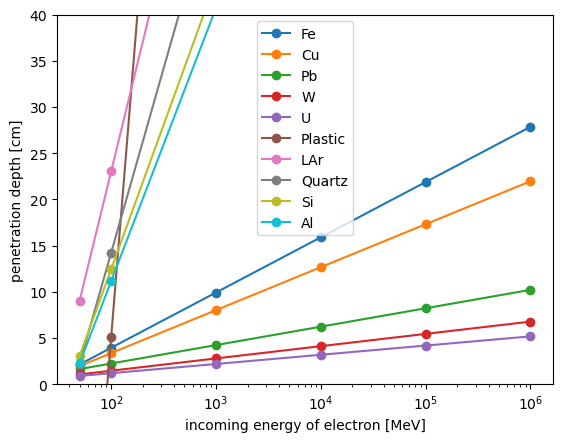

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X0 = np.array([1.8, 1.4, 0.6, 0.4, 0.3, 42, 14, 12, 9.4, 8.9])
interaction_length = np.array([17, 15, 17, 9.6, 11, 80, 84, 43, 46, 39])
Ec = np.array([22, 19, 7.6, 8.1, 6.5, 92, 32, 44, 40, 42])
material_name=['Fe', 'Cu', 'Pb', 'W', 'U', 'Plastic', 'LAr', 'Quartz', 'Si', 'Al']
incoming_energy = np.array([50, 100, 1000, 1e4, 1e5, 1e6]) # incoming energy of electron (50MeV-1TeV)
for i in range(len(X0)):
    penetration_depth = X0[i]*np.log(incoming_energy/Ec[i])/np.log(2)
    plt.plot(incoming_energy, penetration_depth, '-o', label=material_name[i])
plt.xlabel('incoming energy of electron [MeV]')
plt.ylabel('penetration depth [cm]')
plt.xscale('log')
plt.ylim(0, 40)
plt.legend()

#### Hadrons

### Detectors geometry

The main purpose is to measure the four-momentum of particles.

First of all, let's look at the whole detector's photo.

![detector_ATLAS](https://ars.els-cdn.com/content/image/1-s2.0-S0168900207020414-gr1.jpg)
- [Inner Tracking Detectors](https://atlas.cern/Discover/Detector/Inner-Detector) (ITK, central region)
    - Purpose: Measure the momentum of charged particles by measuring the tracks that the particles deposit in various media as they pass through.
    - Method: By measuring the radius of curvature of the track, we can get the momentum $p=Bqr$ of the particle.
    - Particles: Only charged particles will leave traces behind (neutral particle like photon, neutrino won't)
    - Components
        - **Pixel Detector** (HL-LHC)
        - **Semiconductor Trakcer** (SCT)
        - **Transition Radiation Tracker** (TRT)
    
    ![inner_detector_medium](https://mediaarchive.cern.ch/MediaArchive/Photo/Public/2008/0803014/0803014_01/0803014_01-A5-at-72-dpi.jpg)
- [Calorimeters](https://atlas.cern/Discover/Detector/Calorimeter) (outer region)
    - Purpose: Measure the energy of particles by stopping them and detecting the energy that is released as they stop. Calorimeters can stop most known particles except muons and neutrinos.
    - Components
        - ECal: mostly stops photon $\gamma$ and electrons/positrons $e^{\pm}$
        - HCal: mostly stops quarks and gluons
    
    ![cal_medium](https://mediaarchive.cern.ch/MediaArchive/Photo/Public/2008/0803015/0803015_01/0803015_01-A5-at-72-dpi.jpg)
- Muon detectors (outsider)
    - Purpose: Stop muons and measure their energies

### Detector Technologies
- barrel region: cylindrical around the beam pipe
- forward detectors: bookend the barrel and measure particles in the large $|\eta|$ region
1. Megnet systems
   - Components
       - central solenoid: surrounds the inner detector
       - toroid system
           - barrel toroid
           - endcap toroid
   ![maget_systems](https://ars.els-cdn.com/content/image/1-s2.0-S0168900207020414-gr2.jpg)
   [ATLAS central solenoid paper](https://www.sciencedirect.com/science/article/pii/S0168900207020414)
2. 

1. [Intro](#InnerDetector)<br>
    1.1 [Part A](#pA)<br>
    1.2 [Part B](#pB)<br>
    1.3 [Part C](#pC)<br>
2. [Main](#main)<br>

### Plot of ATLAS Detector (Run 3)

![Whole_Detector_run3](https://cds.cern.ch/record/2859916/files/fig_02.png)

## Time schedule


### Brief History of Run 1 and Run 2

In [23]:
import pandas as pd
df = pd.DataFrame({
    "Run 1": ['2009-2013', 7, '?'],
    "Run 2": ['2015-2018', 13, f'{2.1e34}'],
    "Run 3": ['2022-2025', 13.5, f'{2e34}'],
    "HL-LHC": ['2029-future', '?', f'{5e34}']},
    index=['Year', r'$\sqrt{s}$(TeV)', r'Peak Instantaneous Luminosity($cm^{-2}\cdot s^{-1})$']
)

df

,Run 1,Run 2,Run 3,HL-LHC
Year,2009-2013,2015-2018,2022-2025,2029-future
$\sqrt{s}$(TeV),7,13,13.5,?
Peak Instantaneous Luminosity($cm^{-2}\cdot s^{-1})$,?,2.1e+34,2e+34,5e+34


### Run 3 and the future schedule

![run3](https://lhc-commissioning.web.cern.ch/schedule/images/2024/Complex-Long-Term-June24.png)

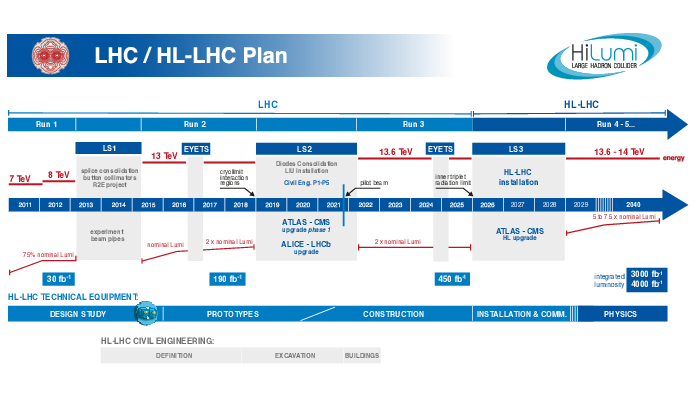

In [7]:
from wand.image import Image as WImage
from wand.display import display
img = WImage(filename='https://hilumilhc.web.cern.ch/sites/default/files/HL-LHC_Janvier2022.pdf')
img

## Basic Concepts

### Luminosity
#### Instantaneous luminosity $(cm^{-2}\cdot s^{-1})$
measures how tightly particles are packed into a given space, such as the LHC's proton beam. A higher luminosity means a greater likelihood particles will collide and result in a desired interaction. This can be achieved by packing more particles in the beam, or by focusing the beam more tightly.
#### Integrated luminosity $(pb^{-1})$
on the other hand, considers the total number of events during a period of data-taking. The ATLAS Experiment recorded 147 inverse femtobarns of data during the LHC's 13 TeV run from 2015-2018, which equates to about 16 million billion proton–proton collision

[Cross section & Luminosity Cheetsheet](https://cds.cern.ch/record/2800578/files/Cross%20Section%20and%20Luminosity%20Physics%20Cheat%20Sheet.pdf)s!

### Why colliding beams?
There are two different collision experiments, head-to-head collision and fixed target experiment. Here, we only talk about proton-proton collision, with each beam having 7000GeV initial energy.
#### Head on head collision
All starts from $E^2-\vec{p}^2=m^2$. In the collision of two particles of masses $m_1$ and $m_2$, the total center of mass energy can be expressed in the form
\begin{equation}
M^2=(E_1+E_2)^2-(\vec{p_1}+\vec{p_2})^2
\end{equation}
Since $\vec{p_1}+\vec{p_2}=0$ in the center mass system, so $M=E_1+E_2=1.4TeV$
#### Fixed Target collision
In the fixed target system, $E_1^2-\vec{p_1}^2=m_1^2$ is valid only for one proton. Since the other is stationary, $E_2=m_2$ applies to it with $\vec{p_2}=0$. Substitute them into the equation above, 
\begin{equation}
M^2=(E_1+E_2)^2-(\vec{p_1}+\vec{p_2})^2=m_1^2+m_2^2+2E_1m_2
\end{equation}
Proton mass $m~0.92GeV\approx1GeV$, Thus, total center of mass energy in fixed target system is $M\approx\sqrt{2E_1}\approx\sqrt{1.4TeV}\approx112GeV$

[Source](https://cds.cern.ch/record/941318/files/p361.pdf)

## Inner Detector
The main components of the Inner Detector are: **Pixel Detector** (only in HL-LHC), **Semiconductor Tracker** (SCT), and **Transition Radiation Tracker** (TRT). The main components of the Inner Detector are: Pixel Detector, Semiconductor Tracker (SCT), and Transition Radiation Tracker (TRT).

### Plot of Inner Detector

![InnerDetector](https://mediaarchive.cern.ch/MediaArchive/Photo/Public/2008/0803014/0803014_01/0803014_01-A4-at-144-dpi.jpg)

### Semiconductor Tracker (SCT)

## Calorimeters

### Electro Calorimeter (ECal)
1. Material: Liquid Argone + Lead plate (Endcap + Barrel)
2. 

### Hadron Calorimeter (HCal)
1. Material: Liquid Argone + Lead plate (Endcap); Tile Scintilator (Barrel) (The reason why we don't use the Tile scintilator in Endcap is that Tile is more sensitive to radiation damage)
2. 

## Reference